# 0. Imports

In [92]:
import numpy as np
import pandas as pd
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

# 1. Carga de datos

In [ ]:
star_df = pd.read_csv("./train_data.csv")

In [94]:
star_df.shape

(4000, 18)

In [95]:
star_df.describe()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,redshift,mjd,rowv,colv
count,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1.237649e+18,185.523295,0.248959,18.609049,17.363397,16.839856,16.597712,16.439392,743.829000,3.37625,419.602000,0.851765,0.895500,0.134015,52957.124750,0.000218,-0.000090
std,4.244222e+11,41.689446,2.001075,0.839431,0.950964,1.055343,1.141252,1.190502,98.865936,1.69909,167.162063,0.071311,0.305946,0.379742,1601.148131,0.008794,0.007457
min,1.237646e+18,10.469743,-1.252763,13.551780,12.974870,12.362850,12.010790,11.799530,211.000000,1.00000,19.000000,0.301912,0.000000,-0.003322,51608.000000,-0.264516,-0.168807
25%,1.237649e+18,162.474666,-0.631824,18.170375,16.796110,16.190785,15.870782,15.628205,752.000000,2.00000,311.000000,0.836866,1.000000,0.000106,51821.000000,-0.001212,-0.001609
50%,1.237649e+18,195.815451,0.053336,18.843745,17.472525,16.850835,16.571195,16.402665,756.000000,3.00000,434.000000,0.860675,1.000000,0.032038,51986.000000,0.000322,0.000125
75%,1.237649e+18,214.348425,0.593396,19.261563,17.997818,17.506640,17.258833,17.147037,756.000000,5.00000,527.000000,0.879834,1.000000,0.086479,54468.000000,0.001698,0.001672
max,1.237650e+18,249.758313,13.854010,19.599750,22.497450,22.265960,28.179630,20.847690,1035.000000,6.00000,812.000000,0.961145,1.000000,4.192597,58932.000000,0.181871,0.128814


In [96]:
star_df.dtypes

objid         int64
ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
run           int64
camcol        int64
field         int64
score       float64
clean         int64
class        object
redshift    float64
mjd           int64
rowv        float64
colv        float64
dtype: object

In [97]:
star_df.sample(5)

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
3467,1237648705676444008,241.891316,0.996462,18.54386,17.38160,16.81115,16.42411,16.20015,752,6,657,0.841992,1,GALAXY,0.054648,51690,-0.001564,-0.009468
1138,1237648721787289914,225.034978,0.398320,19.08014,18.08896,17.56369,17.16841,17.05748,756,4,729,0.901014,1,GALAXY,0.086307,51994,0.002897,-0.000861
2217,1237648721786634246,223.408303,0.336283,19.35374,19.29780,19.32198,19.04956,19.00666,756,4,719,0.875111,1,QSO,1.862033,51994,0.002097,0.001663
2757,1237648705133805752,228.692839,0.490255,19.00450,18.01168,17.53749,17.18568,17.02963,752,5,569,0.891426,1,GALAXY,0.091009,51665,-0.003186,-0.007764
2659,1237648720690937870,173.262825,-0.587077,18.14501,16.79992,16.30426,16.14146,16.10781,756,2,384,0.868921,1,STAR,0.000214,54471,0.001830,-0.000893


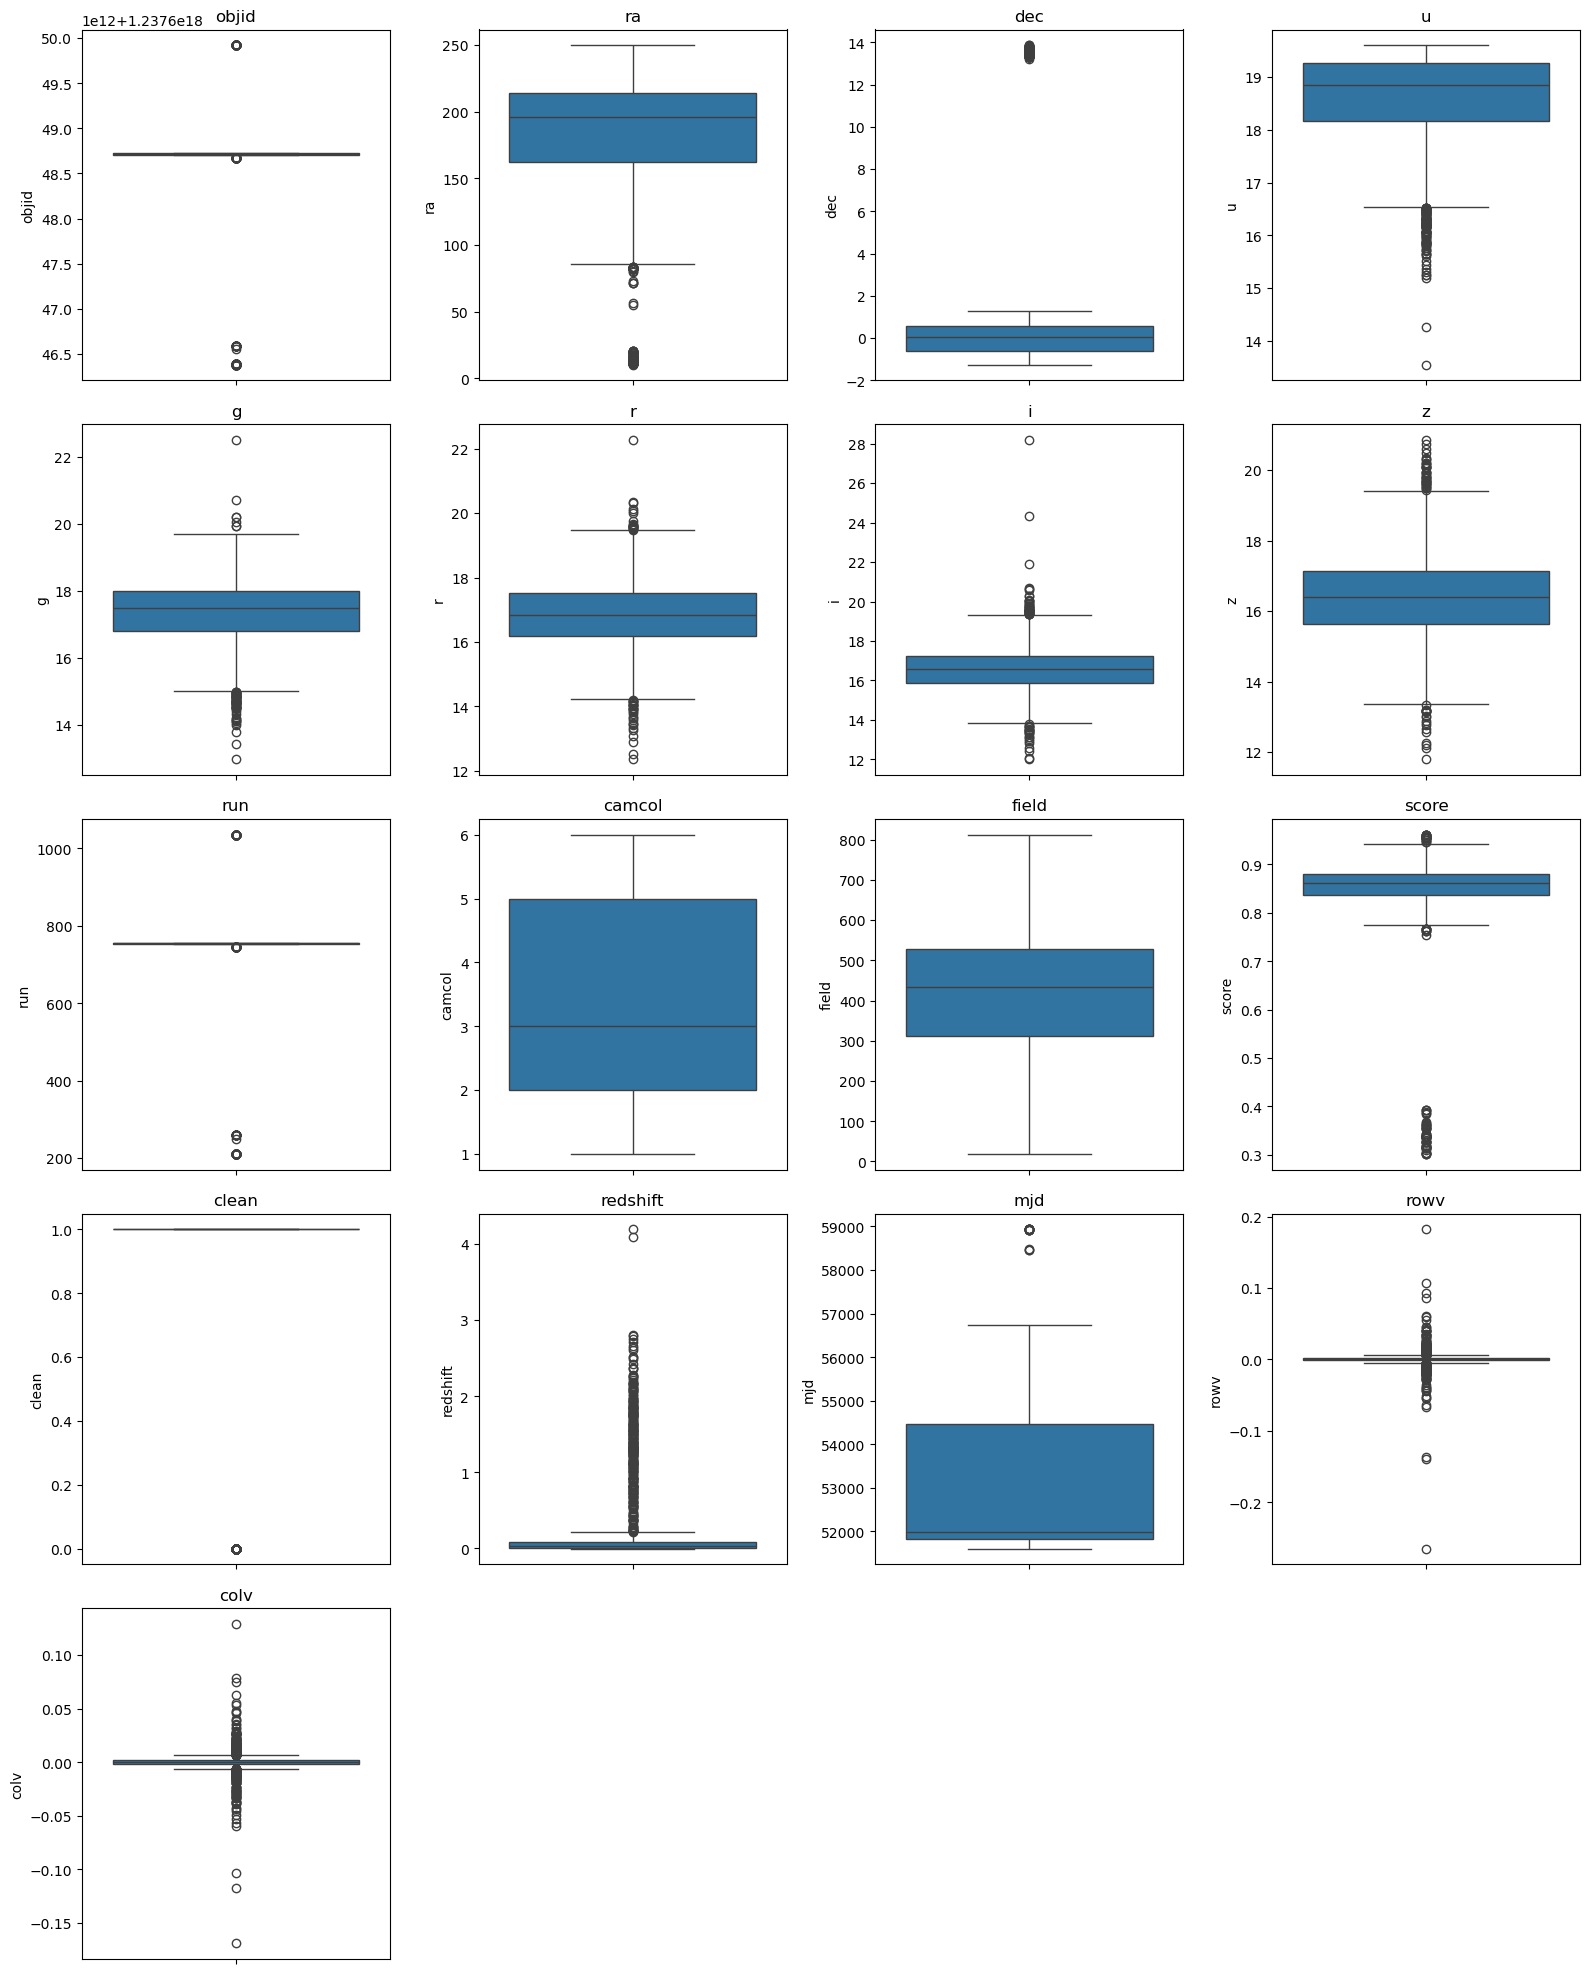

In [98]:

# Excluir la columna 'class' (categórica) y seleccionar solo las numéricas
numeric_cols = star_df.select_dtypes(include=["number"]).drop(columns="class", errors="ignore")

# Definir el número de filas y columnas para la disposición de los subgráficos
num_cols = len(numeric_cols.columns)
cols_per_row = 4  # Número de gráficos por fila
rows = int(np.ceil(num_cols / cols_per_row))  # Calcular filas necesarias

# Crear la figura con subgráficos
fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, 4 * rows))
axes = axes.flatten()  # Convertir la matriz de ejes en una lista

# Generar cada boxplot en su respectiva celda
for i, col in enumerate(numeric_cols.columns):
    sns.boxplot(y=numeric_cols[col], ax=axes[i])
    axes[i].set_title(col)

# Ocultar los gráficos vacíos si hay menos subgráficos de los esperados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Ajustar el diseño
plt.show()


# 2. Entendimiento de los datos

In [99]:
# Reemplazar valores en la columna 'class'
star_df['class'] = star_df['class'].replace({'S': 'STAR', 'G': 'GALAXY', 'QUASAR': 'QSO'})

# Verificar que dentro de 'class' solo existan los tres valores esperados
class_counts = star_df['class'].value_counts()
print(class_counts)

class
GALAXY    1901
STAR      1806
QSO        293
Name: count, dtype: int64


In [100]:
import pandas as pd

# Aplicar One-Hot Encoding y agregarlo al dataframe
star_df = pd.get_dummies(star_df, columns=["class"])

# Mostrar los primeros 5 registros del dataframe
print(star_df.head())

# Ver los nombres de las nuevas columnas creadas
print(star_df.columns)

                 objid          ra       dec         u         g         r  \
0  1237648722306924571  185.574486  0.701402  19.11034  17.62099  17.03464   
1  1237648720167436418  203.801841 -0.853906  18.90957  17.62940  17.01465   
2  1237648720685105352  160.034264 -0.421626  19.26340  17.67693  16.82551   
3  1237648703510937836  200.807373 -0.682024  18.82022  17.77765  17.38575   
4  1237648720161275992  189.792404 -1.001480  18.91391  19.05355  19.46278   

          i         z  run  camcol  field     score  clean      redshift  \
0  16.82993  16.71711  756       5    466  0.864145      1  8.780529e-05   
1  16.62059  16.35239  756       1    588  0.816541      1  8.619995e-02   
2  16.42307  16.13864  756       2    295  0.870381      1  1.330486e-01   
3  17.11128  16.93540  752       2    382  0.867801      1  8.636355e-02   
4  19.75660  20.09613  756       1    494  0.833824      1 -4.090000e-08   

     mjd      rowv      colv  class_GALAXY  class_QSO  class_STAR  
0  541

In [101]:
star_df["redshift"] = star_df["redshift"].apply(lambda x: -x if x < 0 else x)

In [102]:
# Eliminar registros donde clean es 0
star_df = star_df[star_df["clean"] != 0].reset_index(drop=True)

# Verificar que no quedan valores de clean = 0
print(star_df["clean"].value_counts())


clean
1    3582
Name: count, dtype: int64


In [103]:
#features = ["ra", "dec", "u", "g", "r", "i", "z", "run", "camcol", "field", "score", "clean", "mjd", "rowv", "colv"]
features = ['u', 'g', 'i', 'class_GALAXY', 'class_QSO', 'class_STAR']
star_df[["redshift"] + features].isnull().sum() / star_df.shape[0]



redshift        0.0
u               0.0
g               0.0
i               0.0
class_GALAXY    0.0
class_QSO       0.0
class_STAR      0.0
dtype: float64

### 2.1 Búsqueda de relaciones con la variable objetivo

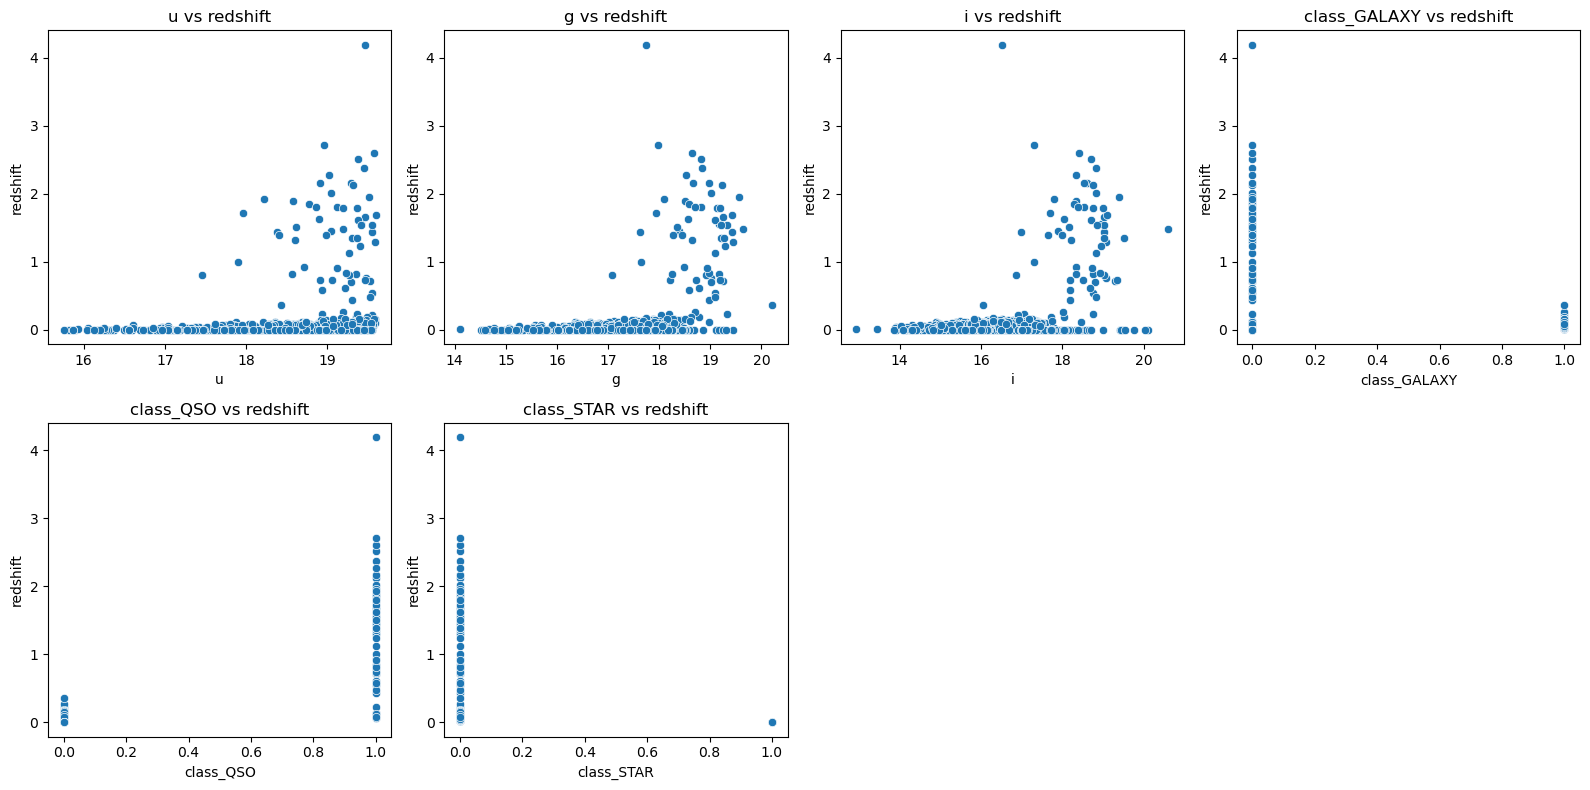

In [104]:
sampled_data = star_df.sample(frac=0.2)
num_features = len(features)
cols_per_row = 4  # Número de columnas por fila
rows = int(np.ceil(num_features / cols_per_row))  # Calcular filas necesarias

# Crear la figura con subgráficos
fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, 4 * rows))
axes = axes.flatten()  # Convertir la matriz de ejes en una lista

# Generar cada scatterplot
for i, feature in enumerate(features):
    sns.scatterplot(x=sampled_data[feature], y=sampled_data["redshift"], ax=axes[i])
    axes[i].set_title(f"{feature} vs redshift")

# Ocultar los gráficos vacíos si hay menos variables que espacios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 2.2 Búsqueda de relaciones entre las variables de entrada

<Axes: >

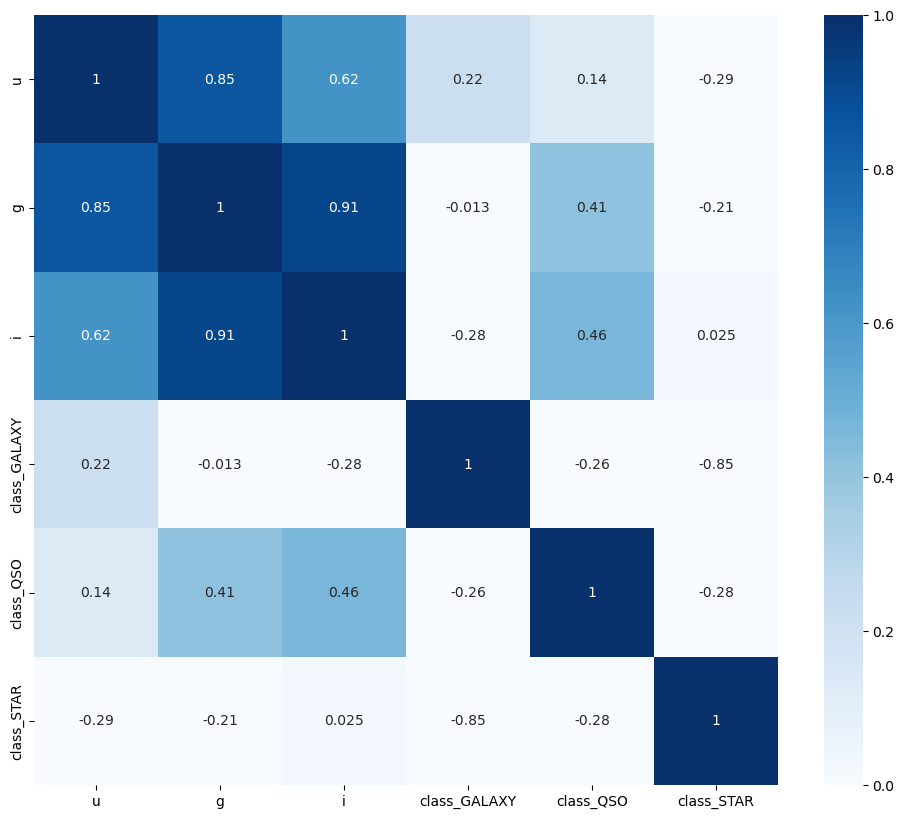

In [105]:
plt.figure(figsize=(12, 10))
sns.heatmap(star_df[features].corr(), cmap="Blues", vmin=0, vmax=1,annot=True)

# 3. Preparación de los datos

### 3.1. Relacionando con la calidad de los datos

In [106]:
# Se eliminan registros con valores nulos en "redshift" o cualquier feature
star_df = star_df.dropna(subset=["redshift"] + features)


In [107]:
star_df.shape

(3582, 20)

In [108]:
star_df[["redshift"]+features].isnull().sum() / star_df.shape[0]

redshift        0.0
u               0.0
g               0.0
i               0.0
class_GALAXY    0.0
class_QSO       0.0
class_STAR      0.0
dtype: float64

In [109]:
total_rows = star_df.shape[0]
total_rows

3582

In [110]:
star_df.loc[star_df.duplicated(subset=features, keep=False)].head(3)

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,redshift,mjd,rowv,colv,class_GALAXY,class_QSO,class_STAR
79,1237648703513428079,206.374167,-0.781673,18.28101,17.18856,16.70175,16.33173,16.14626,752,2,420,0.904768,1,0.088136,51943,-0.002860,0.001156,True,False,False
96,1237648721231609897,182.015940,-0.116600,17.96686,16.91550,16.75447,16.68648,16.70880,756,3,442,0.876962,1,0.000066,51615,-0.000639,0.000270,False,False,True
101,1237646382079606869,94.679499,0.842321,18.47695,16.94897,16.68126,16.59887,16.51747,211,6,359,0.806204,1,0.000207,52931,0.000372,-0.001017,False,False,True


In [111]:
duplicated_rows = star_df.loc[star_df.duplicated(subset=features, keep=False)].shape[0]
duplicated_rows

32

In [112]:
print(f"Duplicates: {(duplicated_rows/total_rows)*100:.4f}%")

Duplicates: 0.8934%


In [113]:
star_df.loc[star_df.duplicated(subset=features+["redshift"], keep=False)].tail(4)

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,redshift,mjd,rowv,colv,class_GALAXY,class_QSO,class_STAR
3103,1237648721231609897,182.015940,-0.116600,17.96686,16.91550,16.75447,16.68648,16.70880,756,3,442,0.876962,1,0.000066,51615,-0.000639,0.000270,False,False,True
3221,1237648705132888168,226.621828,0.595329,18.96363,18.67637,18.47234,18.41949,17.96547,752,5,555,0.871417,1,0.369813,51990,0.002106,-0.000110,False,True,False
3314,1237648720166715396,202.135618,-0.933404,18.68036,17.16083,16.49770,16.15339,15.95089,756,1,577,0.804931,1,0.054868,51959,0.002469,0.001023,True,False,False
3523,1237648721789780467,230.664376,0.229439,19.48961,18.21590,17.50523,17.09294,16.87079,756,4,767,0.872553,1,0.112827,51673,0.008122,0.012494,True,False,False


### 3.2. Particionamiento del conjunto de datos en entrenamiento y en prueba

In [114]:
from sklearn.model_selection import train_test_split

# Variables de entrada (features) y variable objetivo (target)
features = ['u', 'g', 'i', 'class_GALAXY', 'class_QSO', 'class_STAR']
X = star_df[features]
y = star_df["redshift"]

# División en 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño de entrenamiento: {X_train.shape}")
print(f"Tamaño de prueba: {X_test.shape}")


Tamaño de entrenamiento: (2865, 6)
Tamaño de prueba: (717, 6)


# 4. Entrenamiento de modelos

### 4.1. Entrenamiento de modelo con scaler

In [115]:
scaler = StandardScaler()

# Ajustar el scaler en los datos de entrenamiento y transformar ambos conjuntos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
regression = LinearRegression()
regression.fit(X_train_scaled, y_train)

# Predicción en los datos de prueba
y_pred = regression.predict(X_test_scaled)

In [117]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 0.0574
MSE: 0.0315
R²: 0.7444


### 4.2. Entranamiento de modelo sin scaler

### 4.3. Interpretación de los coeficientes y del intercepto

In [118]:
pd.DataFrame({"columns": features, "coef": regression.coef_})

,columns,coef
0,u,0.008078
1,g,-0.019667
2,i,0.029047
3,class_GALAXY,-0.057900
4,class_QSO,0.296196
5,class_STAR,-0.104266


In [119]:
regression.intercept_

0.14231191484842207

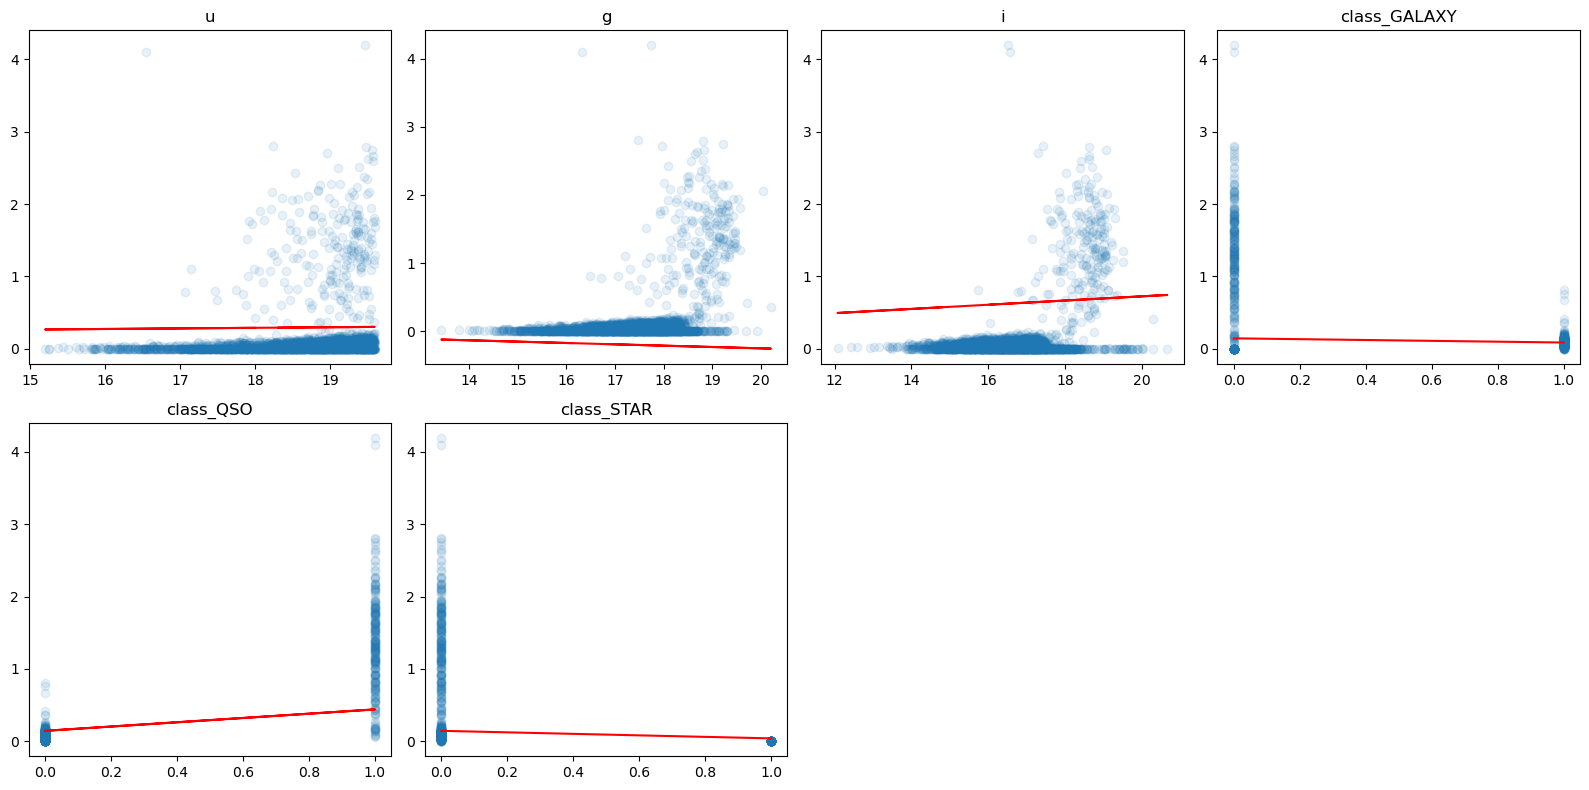

In [120]:
# Configurar la cantidad de filas y columnas para la matriz de gráficos
num_features = len(features)
cols_per_row = 4  # Número de columnas por fila
rows = int(np.ceil(num_features / cols_per_row))  # Calcular número de filas

# Crear la figura con subgráficos
fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, 4 * rows))
axes = axes.flatten()  # Convertir la matriz en una lista para iterar fácilmente

# Graficar la regresión para cada variable
for i, feature in enumerate(features):
    x = X_train[feature]
    m = regression.coef_[i]
    b = regression.intercept_

    axes[i].plot(x, y_train, "o", alpha=0.1)  # Datos de entrenamiento
    axes[i].plot(x, x * m + b, color="red")   # Línea de regresión
    axes[i].set_title(feature)

# Ocultar gráficos vacíos si hay más espacios de los necesarios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
